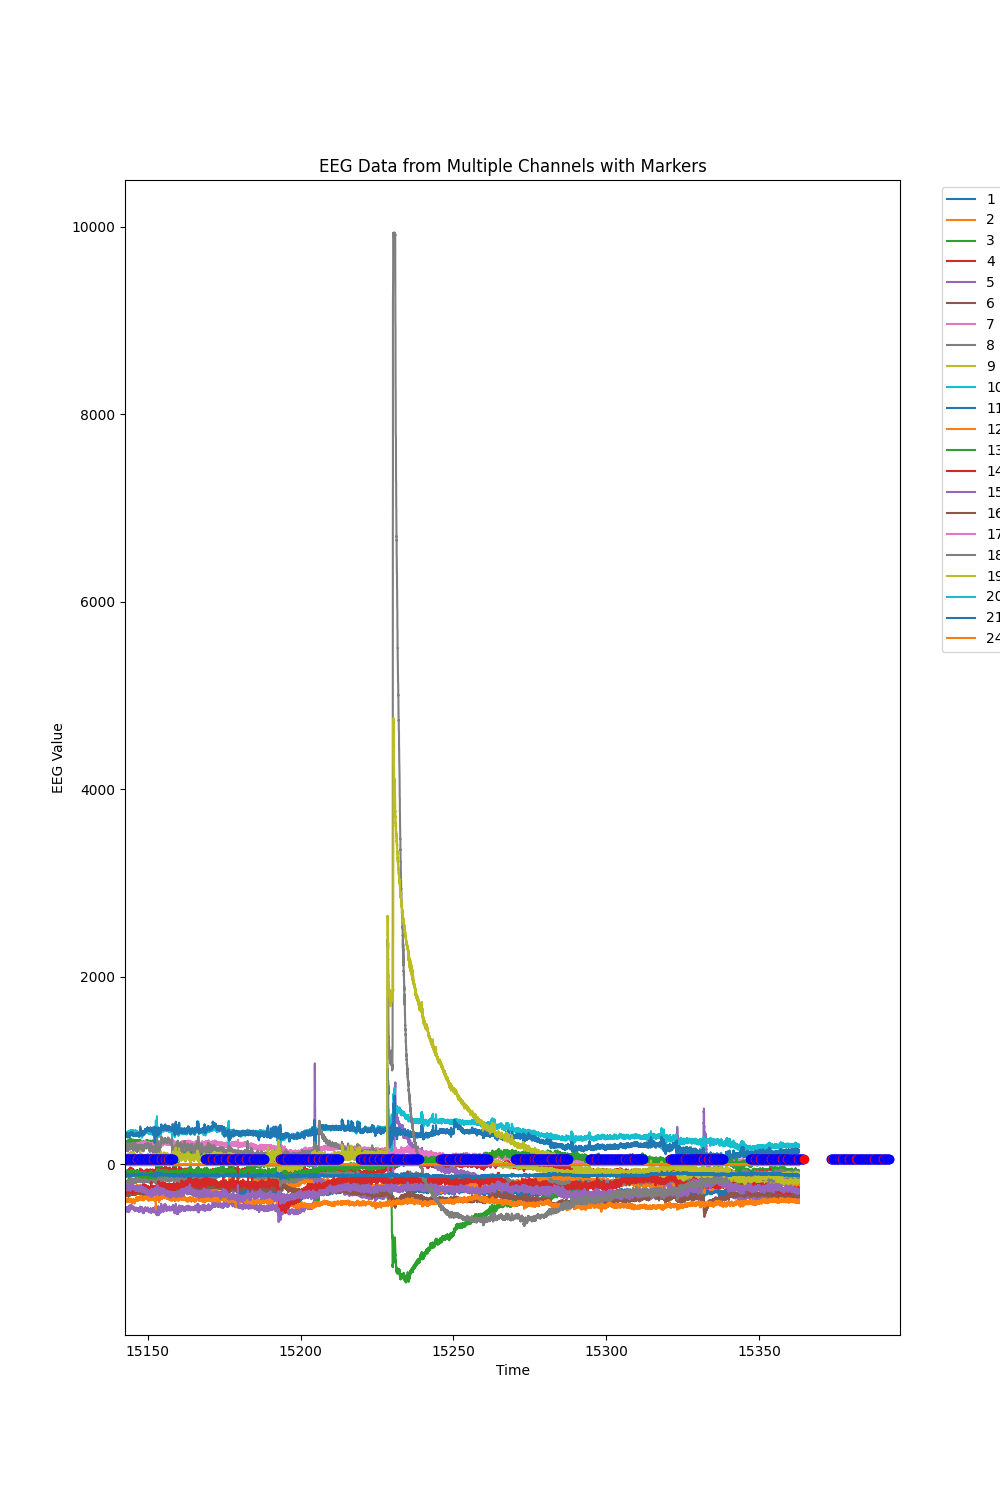

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipympl
import numpy as np

# Enable interactive plots
    
%matplotlib widget

# Load the data
eeg_data = pd.read_csv('./2024-06-11 13-48-58_EEG_01_15_Hz.csv')
markers = pd.read_csv('./2024-06-11 13-48-58_markers.csv')


# Display the first few rows of each dataframe to understand their structure
# print(eeg_data.head())
# print(markers.head())



# rename columns
electrode_names = ['Col','Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'Cz', 'C3', 'C4', 'T3', 'T4', 'T5', 'T6','Pz', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'Unsure', 'Unsure1', 'Trigger', 'time_stamps']
eeg_data.columns = electrode_names 
# eeg_data = eeg_data.drop(columns=['Unsure', 'Unsure1', 'Trigger'])


# Assuming the EEG data has columns named 'Channel1', 'Channel2', ..., 'Channel24' and 'Time'
channel_columns = eeg_data.columns[1:-1]  # All columns except the first last one
time_column = eeg_data.columns[-1]  # The last column


# Slice the data to plot every 100th row
eeg_data_sliced = eeg_data #.iloc[::10, :]


# assign labels to marker columns
markers.columns = [' ', 'Marker', 'Time']

# Plot the EEG data for all channels
plt.figure(figsize=(10, 15))

for index, channel in enumerate(channel_columns):
    if ((index+1) != 22 and (index+1) != 23):
        plt.plot(eeg_data_sliced[time_column], eeg_data_sliced[channel], label=(index+1))

# Mark events on the EEG plot
for index, row in markers.iterrows():
    if (len(row['Marker']) == 12): # isolate p300 markers (not 0, Trial Started, Trial Ended)
        if (str(row['Marker'])[9] == str(row['Marker'])[11]): # check if chosen stimulus is the one in the marker (to see p300 responses)
            plt.plot(row['Time'], 50, marker='o', color='r', linestyle='--')
        else:
            plt.plot(row['Time'], 50, marker='o', color='b', linestyle='--')



# Set x-axis limit 
plt.xlim(left=markers.iloc[1,-1], right=markers.iloc[-1,-1])


plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.title('EEG Data from Multiple Channels with Markers')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


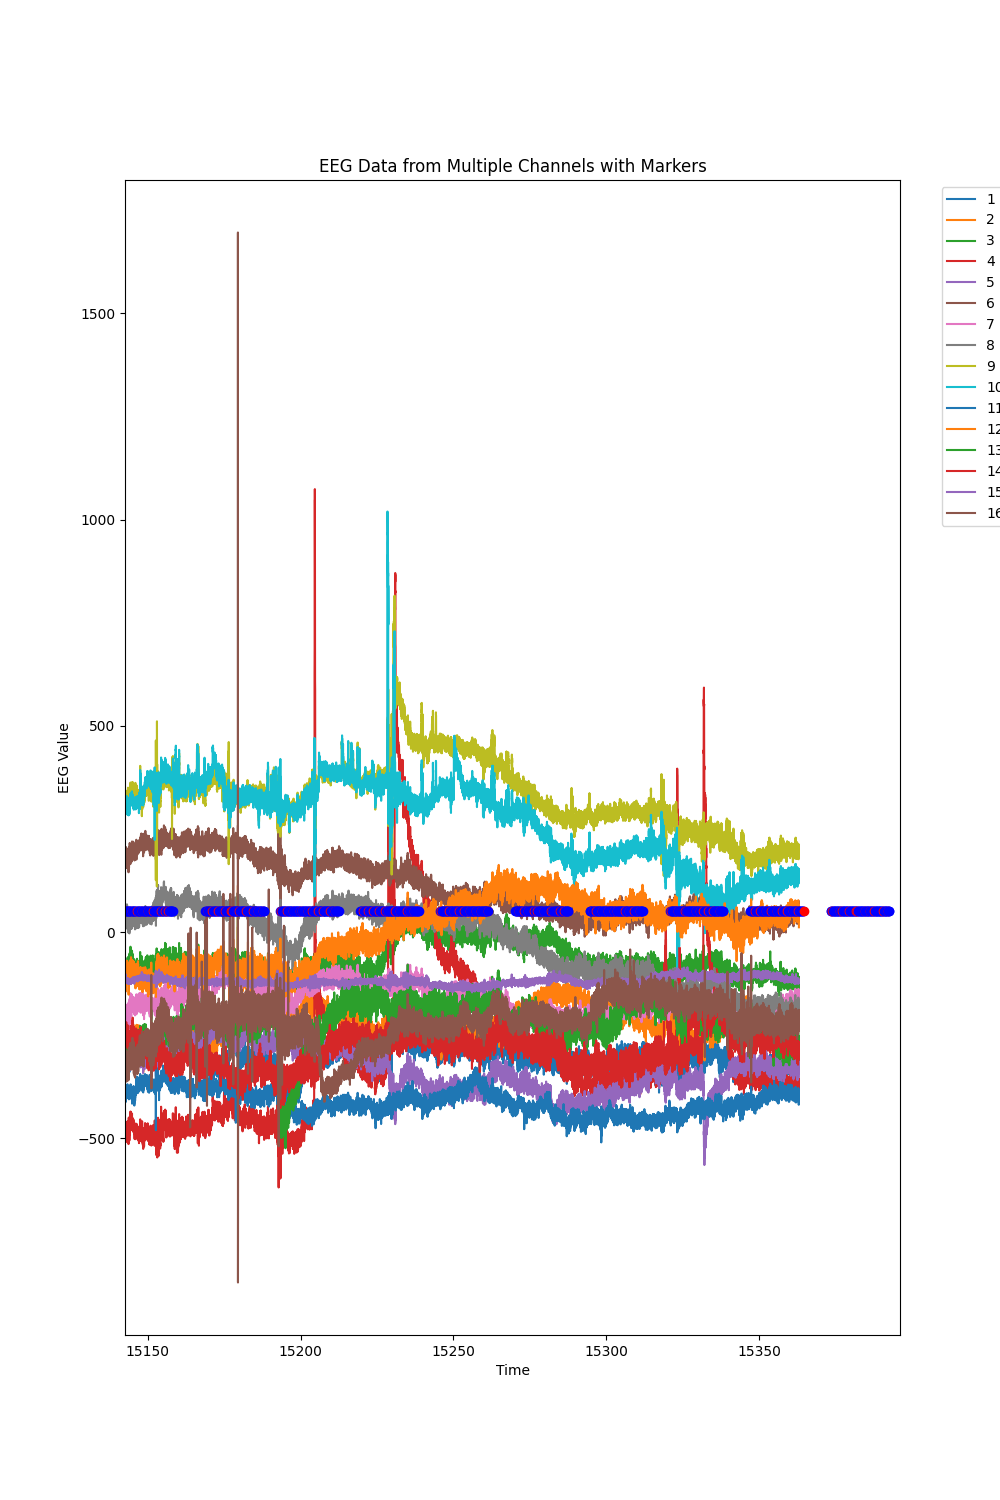

In [2]:
# Define a function to identify bad channels based on variance (MAY NEED TO CHANGE EACH TIME TOO)

from mne import create_info, EpochsArray
from mne.io import RawArray
from mne.preprocessing import ICA
from mne.filter import filter_data
from mne.channels import make_standard_montage


def identify_bad_channels(eeg_data, high_threshold=50000.0, low_threshold=50):
    variances = eeg_data.var(axis=0)
    bad_channels = variances[(variances > high_threshold) | (variances < low_threshold)].index
    return bad_channels

# Identify bad channels
bad_channels = identify_bad_channels(eeg_data[channel_columns])

# Remove bad channels from the data
eeg_data_filtered = eeg_data.drop(columns=bad_channels)
channel_columns_filtered = eeg_data_filtered.columns[1:-1]  # Update channel columns after filtering

# # Convert the EEG data to MNE RawArray format
# sfreq = 300  # Define your sampling frequency
# info = create_info(ch_names=channel_columns_filtered.tolist(), sfreq=sfreq, ch_types='eeg')

# # Add standard electrode locations
# montage = make_standard_montage('standard_1020')
# info.set_montage(montage)

# raw = RawArray(eeg_data_filtered[channel_columns_filtered].T.values, info)
# raw.filter(l_freq=1.0, h_freq=None)

# # Perform ICA
# ica = ICA(n_components=len(channel_columns_filtered), random_state=97, max_iter='auto')
# ica.fit(raw)

# # Plot ICA components to identify artifacts manually (e.g., eyeblinks, muscle artifacts)
# ica.plot_components()
# ica.plot_sources(raw) 

# # Exclude components corresponding to artifacts (you need to identify these manually)
# ica.exclude = [1]  # Replace with the indices of components to exclude

# # Apply ICA to remove artifacts
# raw_clean = raw.copy()
# ica.apply(raw_clean)

# Plot the EEG data for all channels
plt.figure(figsize=(10, 15))

for index, channel in enumerate(channel_columns_filtered):
    if ((index+1) != 22 and (index+1) != 23):
        plt.plot(eeg_data_filtered[time_column], eeg_data_filtered[channel], label=(index+1)) 

# Mark events on the EEG plot
for index, row in markers.iterrows():
    if (len(row['Marker']) == 12): # isolate p300 markers (not 0, Trial Started, Trial Ended)
        if (str(row['Marker'])[9] == str(row['Marker'])[11]): # check if chosen stimulus is the one in the marker (to see p300 responses)
            plt.plot(row['Time'], 50, marker='o', color='r', linestyle='--')
        else:
            plt.plot(row['Time'], 50, marker='o', color='b', linestyle='--')



# Set x-axis limit 
plt.xlim(left=markers.iloc[1,-1], right=markers.iloc[-1,-1])

plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.title('EEG Data from Multiple Channels with Markers')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


       Col         Fp1         Fp2          F3          F4          F7  \
2082  2082 -294.513275 -315.913086  -94.048447 -466.414795 -303.576477   
2083  2083 -290.903900 -312.609283  -97.955841 -468.218720 -305.987366   
2084  2084 -284.885193 -306.585083  -88.925972 -459.789337 -295.152557   
2085  2085 -287.592133 -313.805633  -94.644074 -469.111572 -312.308472   
2086  2086 -283.527405 -310.648071  -95.993828 -473.764435 -309.748566   
...    ...         ...         ...         ...         ...         ...   
2377  2377 -307.308411 -295.656067  -84.622482 -471.412079 -301.319794   
2378  2378 -300.987366 -300.168732  -89.134506 -472.319733 -307.641052   
2379  2379 -309.264587 -301.520203  -96.193031 -472.768951 -309.898529   
2380  2380 -308.360809 -303.628265  -98.001183 -481.785400 -311.101532   
2381  2381 -303.694885 -298.663178 -104.452270 -484.029083 -310.348907   

              F8          Cz         C3          C4          T3          T4  \
2082  195.161026 -205.954529  59

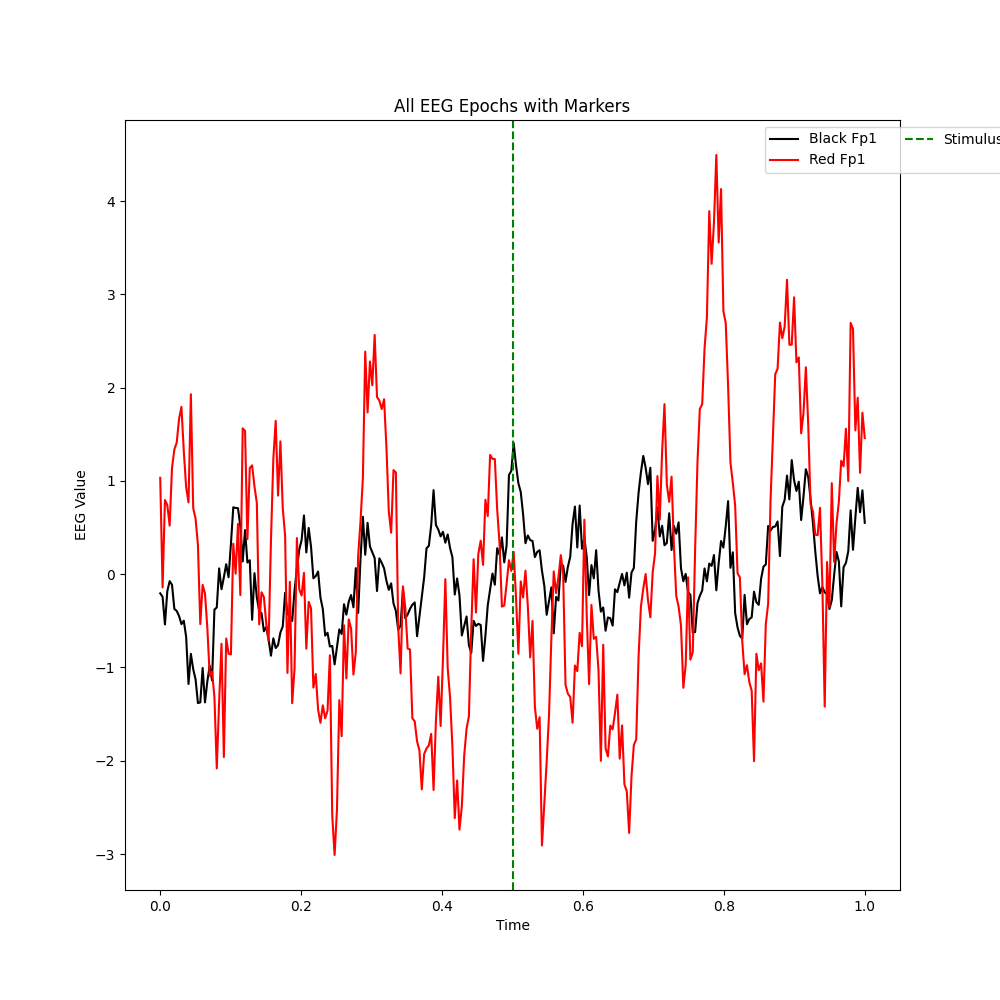

Fp2  - T-statistic: -3.731820184835971
Fp2  - P-value: 0.0004347754884396661
Fp2 - Significant points: True


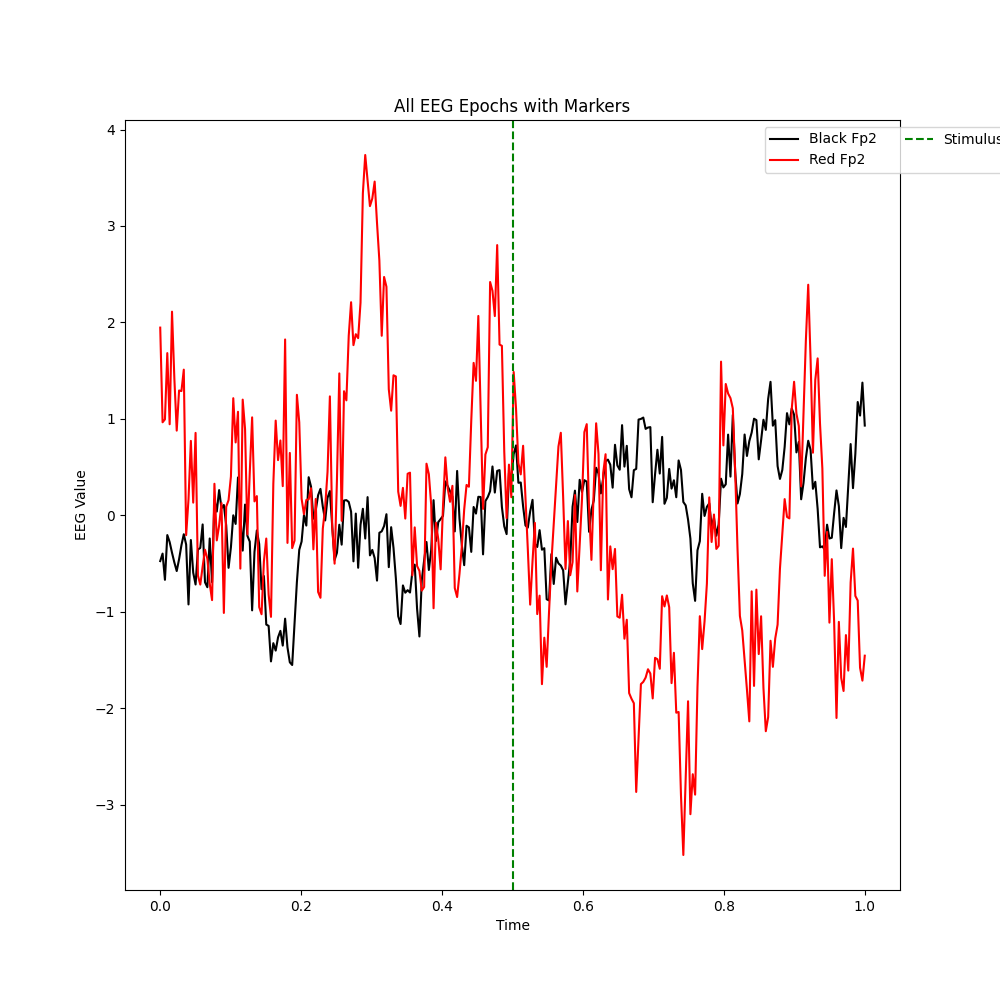

F3  - T-statistic: -0.013590190667073615
F3  - P-value: 0.9892035706739764
F3 - Significant points: False


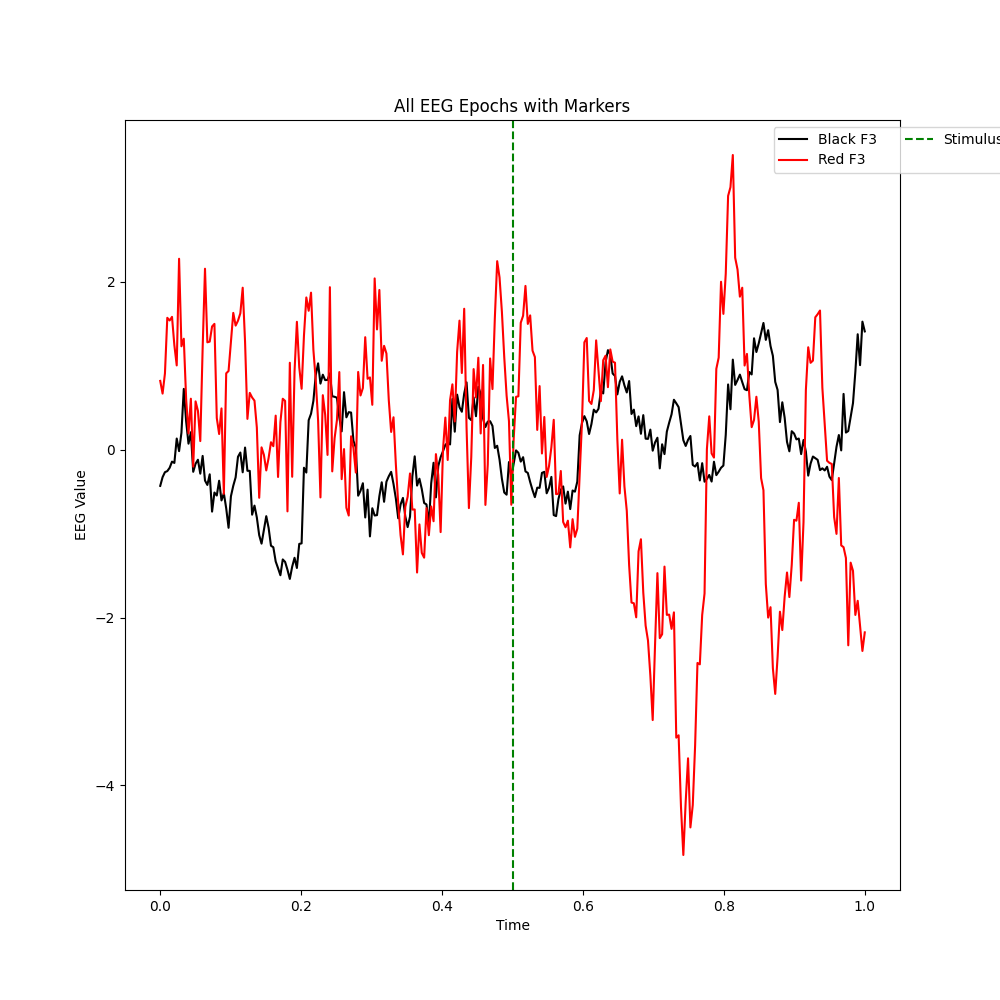

F4  - T-statistic: 14.707063513267345
F4  - P-value: 3.1549104745813853e-21
F4 - Significant points: True


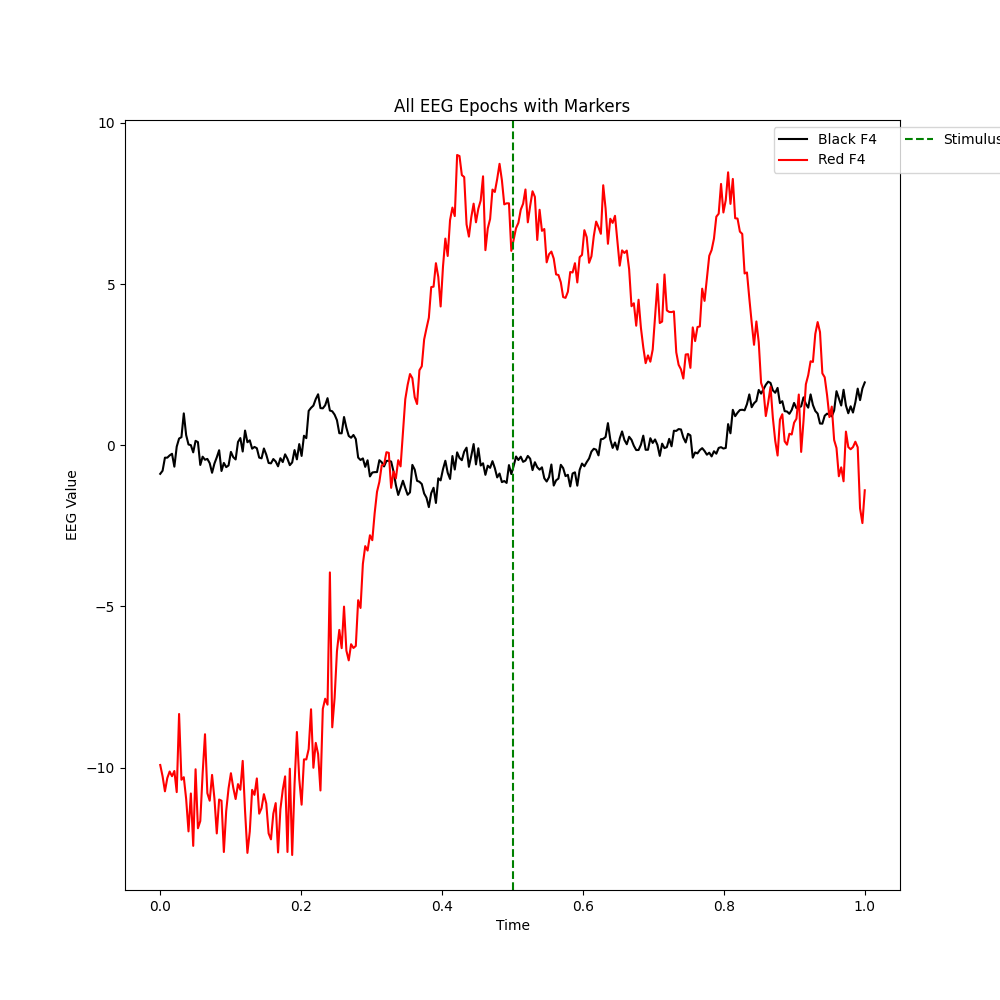

F7  - T-statistic: -0.6558617643348447
F7  - P-value: 0.5145064789949063
F7 - Significant points: False


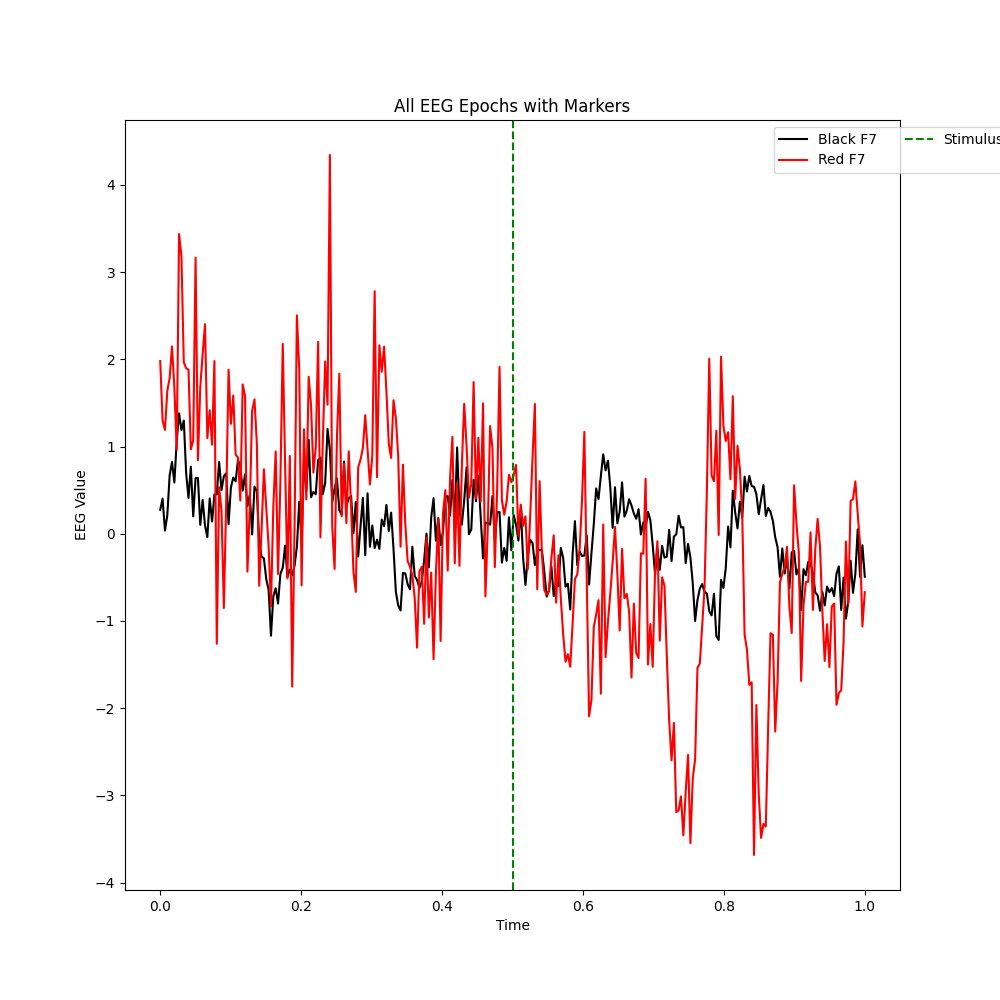

F8  - T-statistic: 0.9817640399307278
F8  - P-value: 0.3302937757411901
F8 - Significant points: False


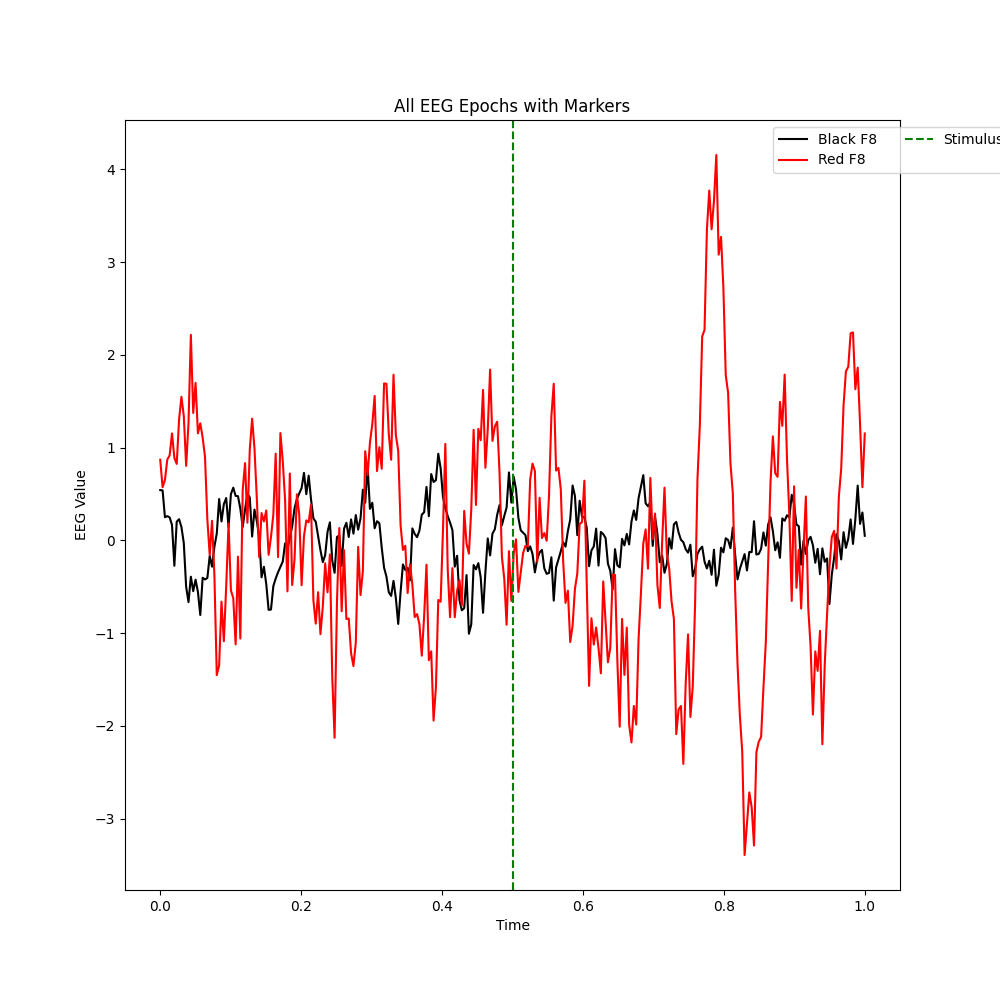

Cz  - T-statistic: 1.1499441531046044
Cz  - P-value: 0.2548864118542728
Cz - Significant points: False


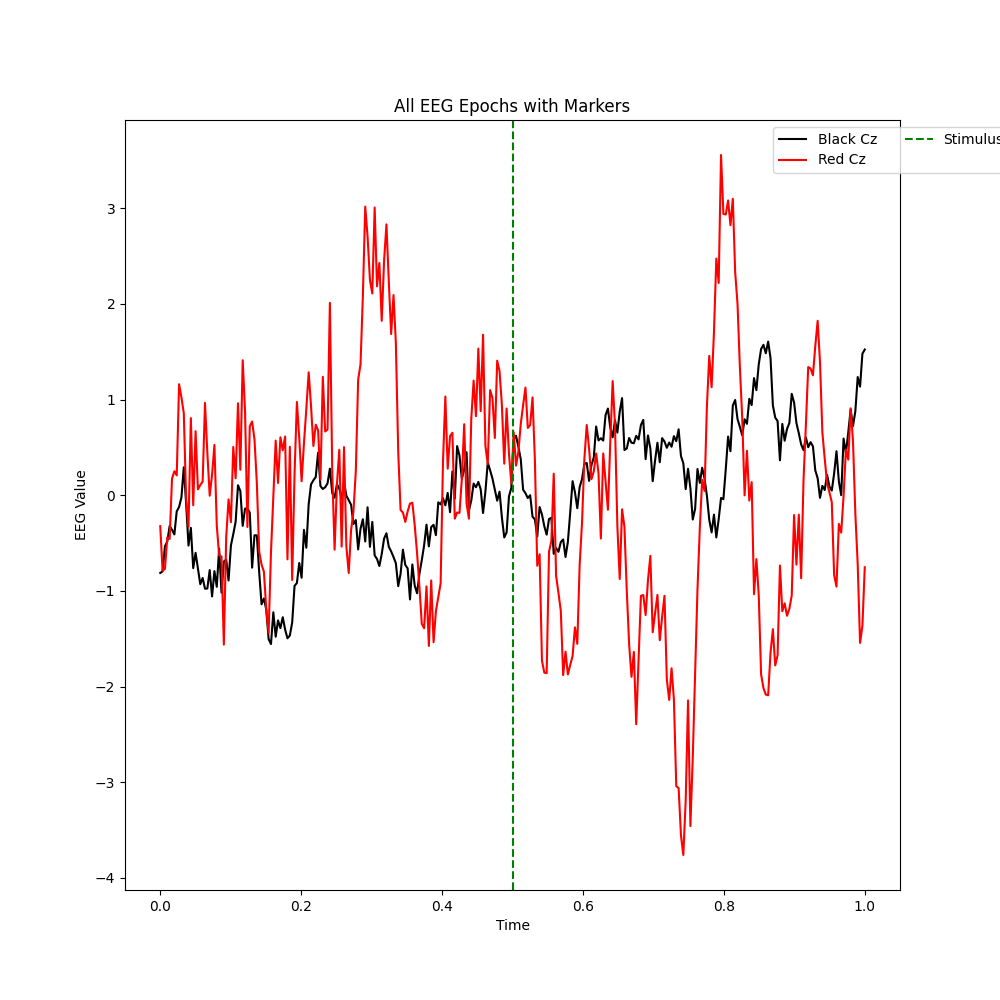

C3  - T-statistic: 2.4525447133683715
C3  - P-value: 0.017214449257933064
C3 - Significant points: True


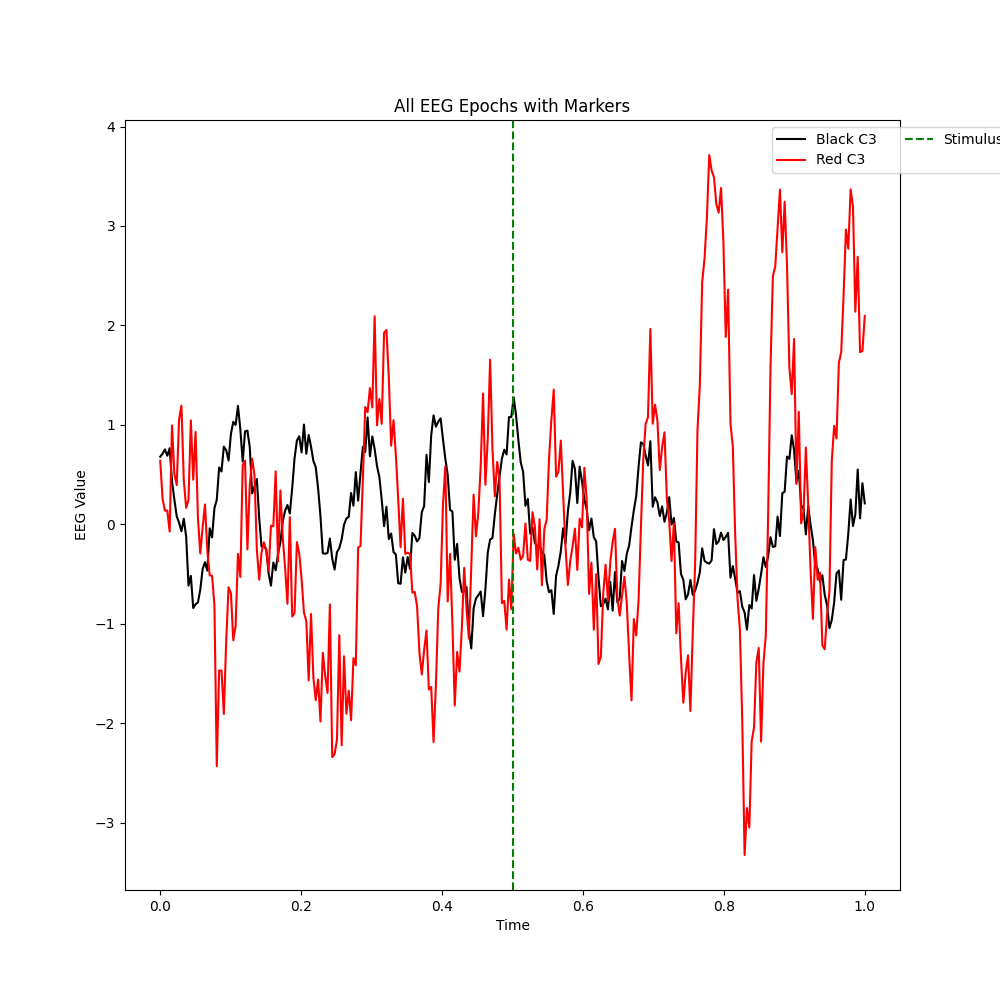

C4  - T-statistic: -3.3650065631433494
C4  - P-value: 0.0013623154328426417
C4 - Significant points: True


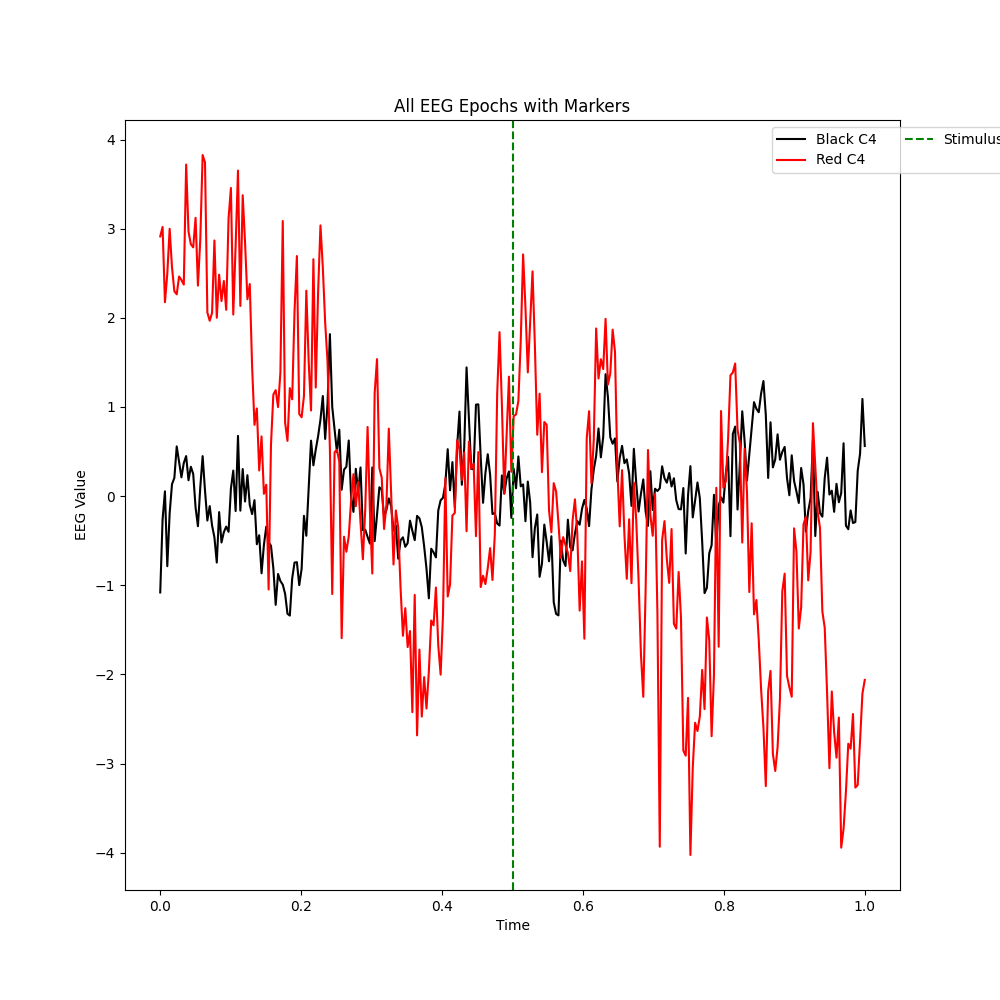

T3  - T-statistic: -7.806575758777599
T3  - P-value: 1.2928335151814187e-10
T3 - Significant points: True


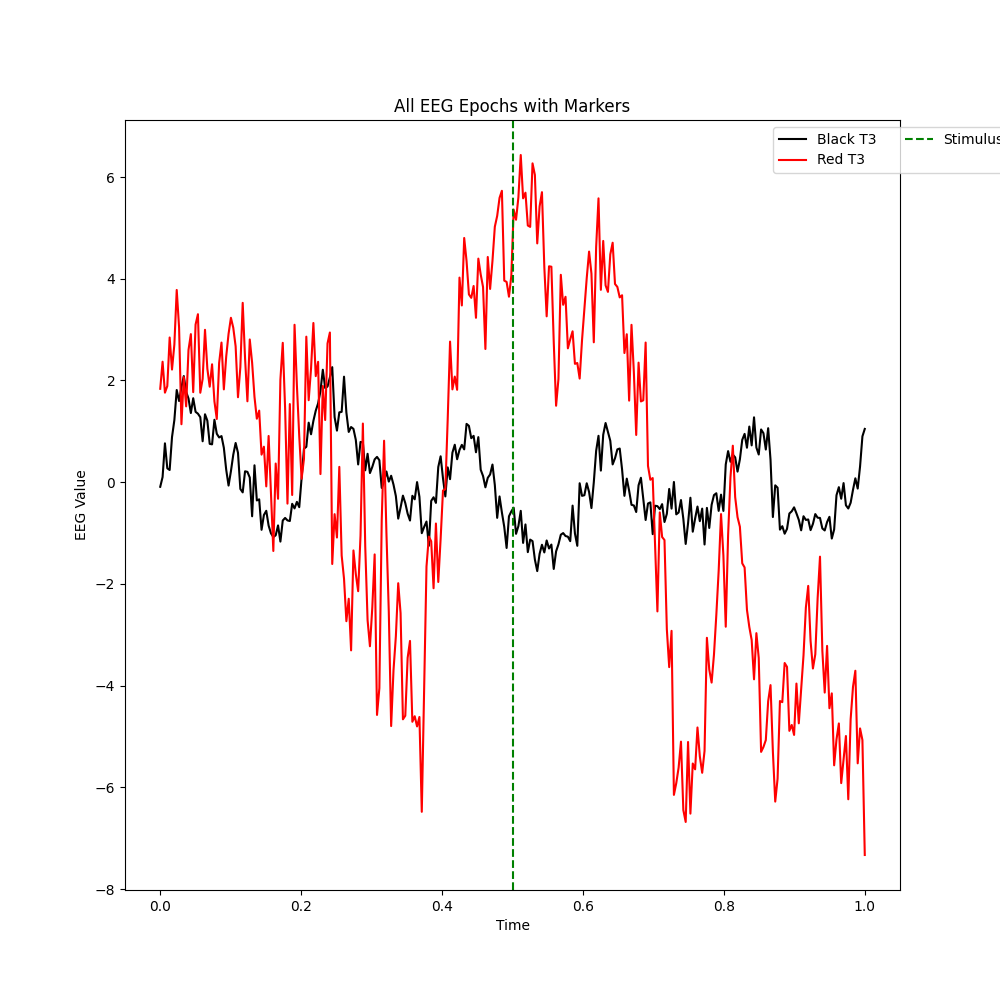

T4  - T-statistic: -3.7292357068788107
T4  - P-value: 0.0004383818190413928
T4 - Significant points: True


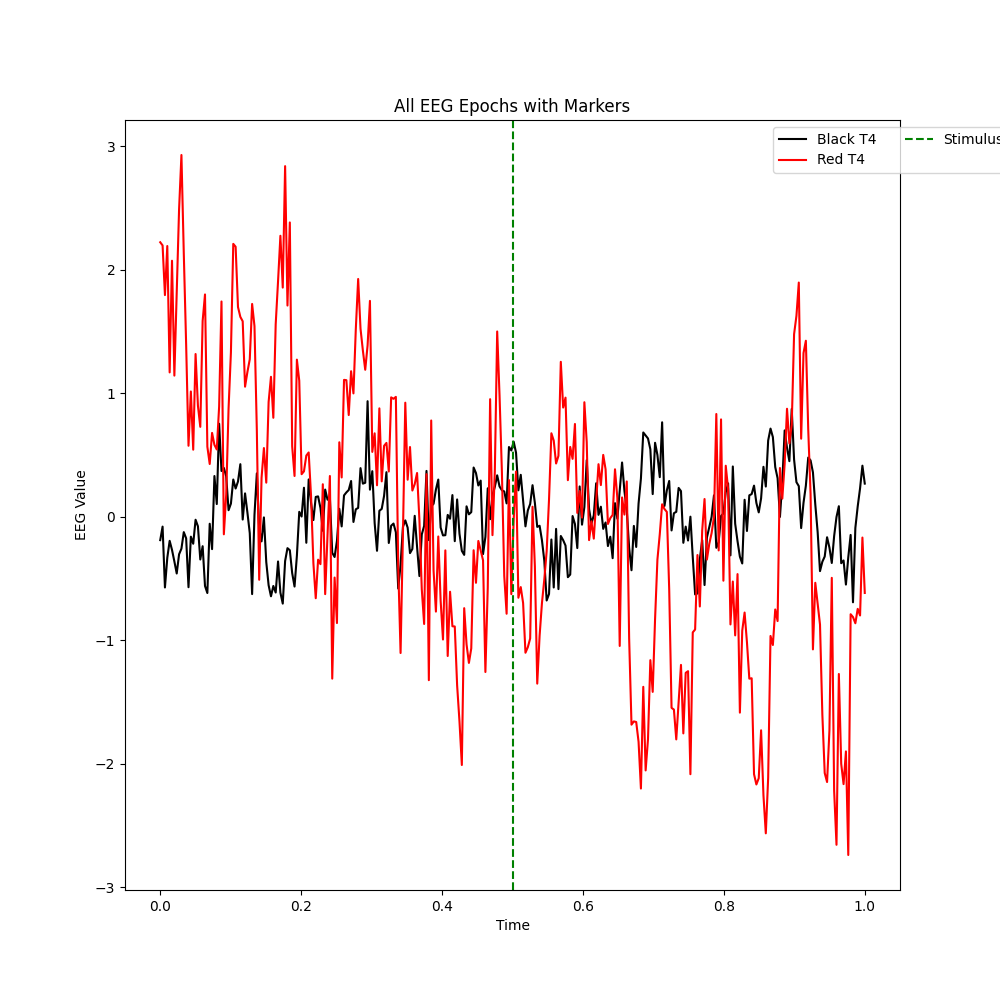

T5  - T-statistic: -2.4916390214194144
T5  - P-value: 0.015596845281435958
T5 - Significant points: True


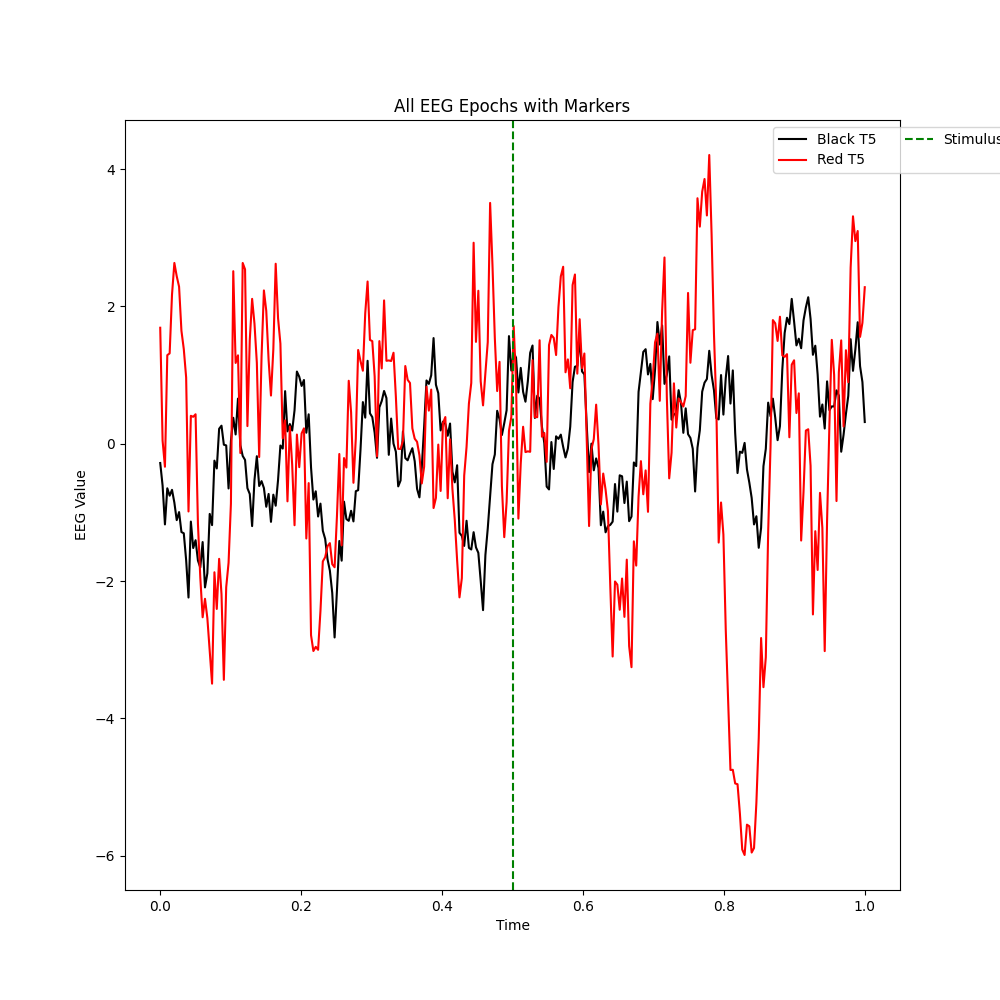

T6  - T-statistic: 0.9023406357809527
T6  - P-value: 0.37060810450001225
T6 - Significant points: False


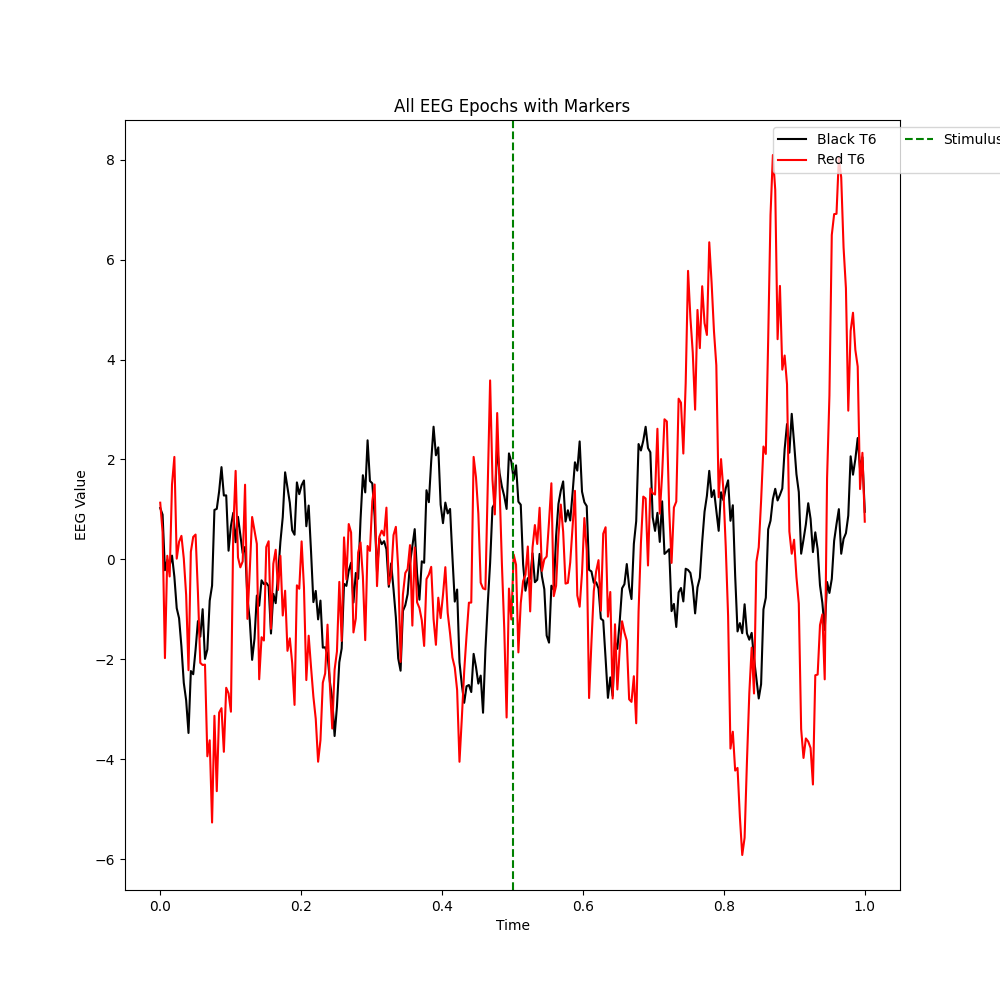

Pz  - T-statistic: 1.693906306114842
Pz  - P-value: 0.09564740317299172
Pz - Significant points: False


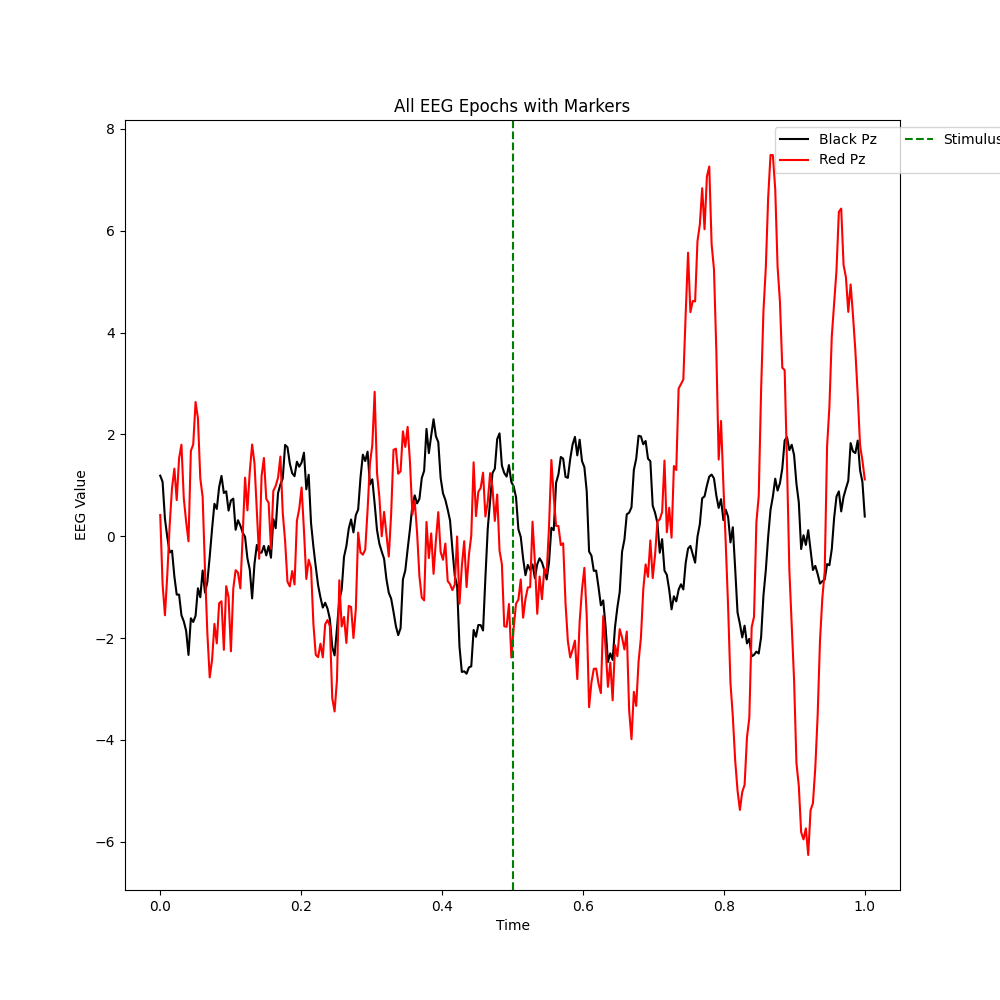

A2  - T-statistic: 1.481452450822944
A2  - P-value: 0.14389874036725087
A2 - Significant points: False


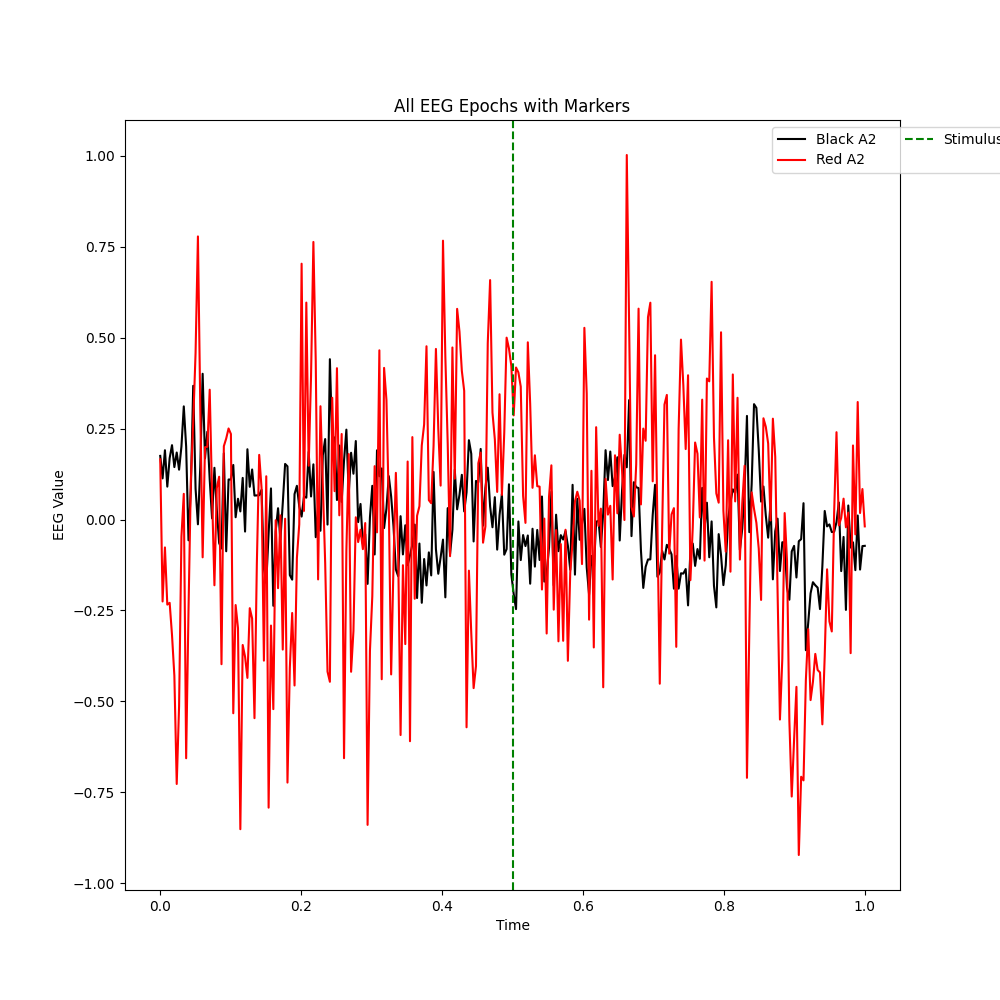

Unsure1  - T-statistic: -1.6916258053678213
Unsure1  - P-value: 0.09608420378610127
Unsure1 - Significant points: False


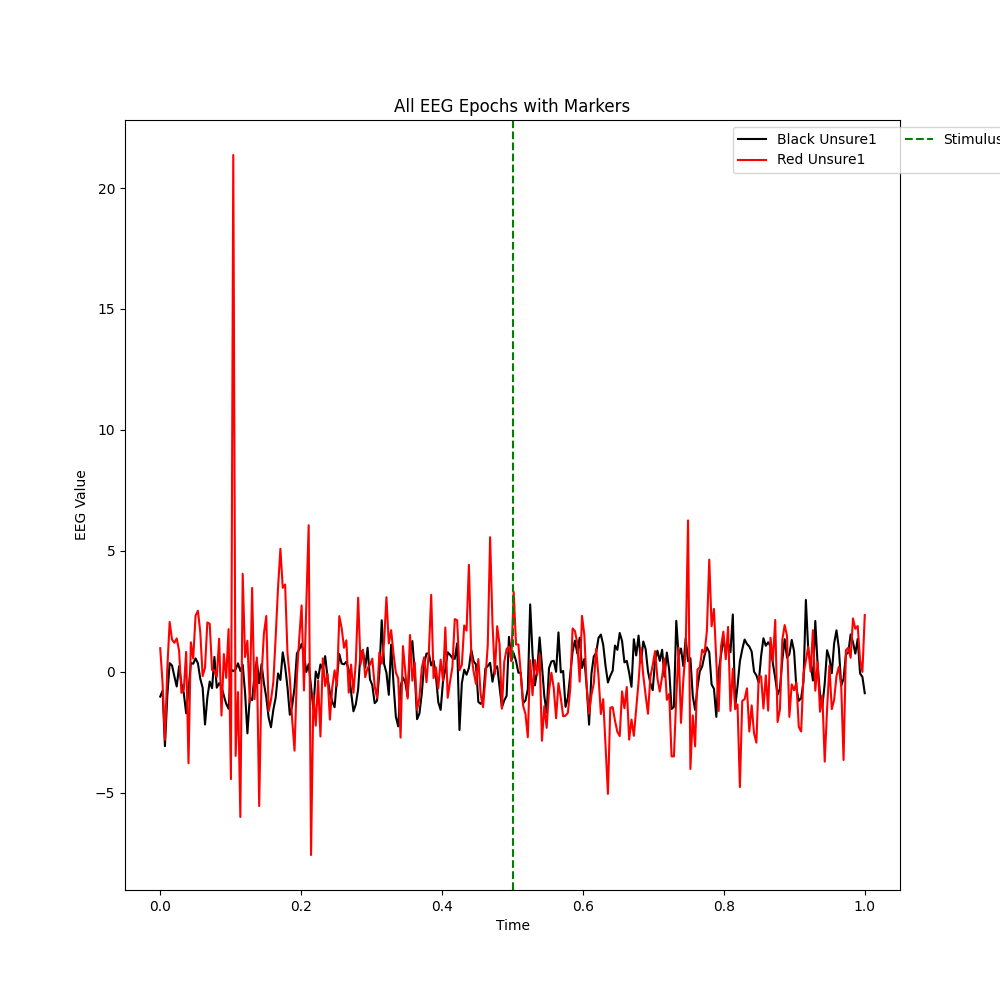

In [3]:
from scipy.stats import ttest_ind

# Define a function to create epochs around markers
def create_epochs(eeg_data, markers, epoch_duration=1.0, sampling_rate=300):
    epochs = []
    half_epoch_samples = int(epoch_duration * sampling_rate / 2)
    time_column = eeg_data.columns[-1]
    
    for index, marker in markers.iterrows():
        if (len(marker['Marker']) == 12):
            marker_time = marker['Time']
            # Find the closest time point in the EEG data
            closest_idx = (np.abs(eeg_data[time_column] - marker_time)).argmin()
            
            # Get the start and end indices for the epoch
            start_idx = max(0, closest_idx - half_epoch_samples)
            end_idx = min(len(eeg_data), closest_idx + half_epoch_samples)
    
            
            # Extract the epoch
            epoch = eeg_data.iloc[start_idx:end_idx].copy()
    
            if (str(marker['Marker'])[9] == str(marker['Marker'])[11]): # check if chosen stimulus is the one in the marker (to see p300 responses)
                epoch["Colour"] = "Red"
            else:
                epoch["Colour"] = "Black"
                
            epochs.append(epoch)
    
    return epochs

# Create epochs

# channel_names = raw_clean.ch_names
# eeg_data_filtered = raw_clean.get_data()
# eeg_data_filtered = pd.DataFrame(eeg_data_filtered.T, columns=channel_names)


sampling_rate = 300  # Assuming a sampling rate of 256 Hz
epochs = create_epochs(eeg_data_filtered, markers, epoch_duration=1.0, sampling_rate=sampling_rate)


#print example epoch data
print(epochs[0])


# # Plot all epochs on the same plot
# plt.figure(figsize=(10, 10))


# overall_red_avg = 0
# overall_black_avg = 0
# overall_count = 0


# Now we will plot each channel individually, averaging its epochs
# iterate through each channel not deemed to be bad
for ind, channel in enumerate(channel_columns_filtered):

    # Initialize lists to collect P300 window data
    red_p300_data = []
    black_p300_data = []

    # Plot epochs on their own  plot
    plt.figure(figsize=(10, 10))
    
    black_first = True
    red_first = True
    red_avg = 0
    black_avg = 0
    black_count = 0
    red_count = 0

    # iterate through each epoch for the channel
    for epoch_index, epoch in enumerate(epochs):
    
                
            
    
        plotted_color = epoch.iloc[0,-1]

        # get channel epoch and do baseline correction
        new_val = epoch[channel].values
        new_val -= epoch[channel].mean()

        
        if plotted_color == "Red":
            if red_first:
                red_avg = new_val
                red_first = False
                red_count += 1
            else:
                if (red_avg.shape == new_val.shape):
                    red_avg += new_val
                    red_count += 1
        else:
            if black_first:
                black_avg = new_val
                black_first = False
                black_count += 1
            else:
                if (black_avg.shape == new_val.shape):
                    black_avg += new_val
                    black_count += 1

    black_avg = black_avg/black_count
    red_avg = red_avg/red_count
    # overall_red_avg += red_avg
    # overall_black_avg += black_avg
    # overall_count += 1

    red_p300_data = red_avg[225:255] # isolate the p300 area (0.75s to 0.85 approx)
    black_p300_data = black_avg[225:255] 

    # generate sampling_rate points to plot on x axis
    x = np.linspace(0, 1, sampling_rate)

    
    # Perform t-test
    t_stat, p_value = ttest_ind(red_p300_data, black_p300_data)
    
    print(channel, " - T-statistic:", t_stat)
    print(channel, " - P-value:", p_value)

    # Mark significant points
    significance_level = 0.05
    significant_points = p_value < significance_level
    print(channel+ " - Significant points:", significant_points)

    #overall_red_avg = overall_red_avg/overall_count
    #overall_black_avg = overall_black_avg/overall_count
    plt.plot(x, black_avg, label= "Black "+ channel, color="Black") #f'Epoch {epoch_index+1} - Channel {index+1}', alpha=0.5)
    plt.plot(x, red_avg, label= "Red "+ channel, color="Red") 
    plt.axvline(x=0.5, color='g', linestyle='--', label='Stimulus')
    
    
    plt.xlabel('Time')
    plt.ylabel('EEG Value')
    plt.title('All EEG Epochs with Markers')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2)
    plt.show()
